In [1]:
import torchvision.transforms as transforms
import medmnist
from medmnist import INFO

In [2]:
data_flag = 'breastmnist'
# data_flag = 'breastmnist'

download = True

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)


Using downloaded and verified file: /home/dante/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/dante/.medmnist/breastmnist.npz


Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: /home/dante/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 156
    Root location: /home/dante/.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning

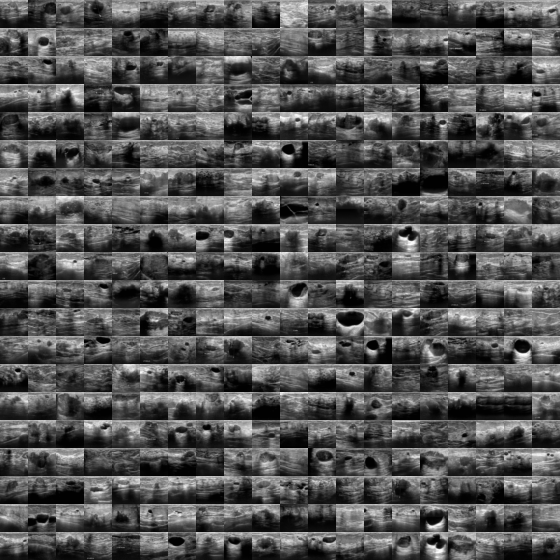

In [3]:
print(train_dataset)
print("========================")
print(test_dataset)

train_dataset.montage(length=20)

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

#  Los datos se cargan en la forma de un DataLoader de PyTorch
print(train_dataset[0][0].shape)

# Convierte los DataLoaders a listas de imágenes y etiquetas
train_images = [image for image, label in train_dataset]
train_labels = [label for image, label in train_dataset]
test_images = [image for image, label in test_dataset]
test_labels = [label for image, label in test_dataset]

print(test_images[0].shape)

# Convierte las listas a arrays de numpy 
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(train_images[0].shape)

# Se aplana las imágenes ya que los clasificadores no aceptan imágenes en 2D
# entonces se convierten a vectores de 1D
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))
print(train_images.shape)


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
(1, 28, 28)
(546, 784)


In [8]:
from sklearn.svm import SVC

clf=SVC(kernel='sigmoid', C=10, tol=1e-3, gamma='auto')

# Ponemos .ravel() para convertir las etiquetas a un array 1D ya que 
#sklearn espera que las etiquetas sean un array 1D de forma (n_samples,), 
# pero se proporcionó un array 2D de forma (n_samples, 1).

clf.fit(train_images, train_labels.ravel())

pred_labels = clf.predict(test_images)

accuracy = accuracy_score(test_labels, pred_labels)
print(f'Precisión del modelo SVM: {accuracy}')

Precisión del modelo SVM: 0.7756410256410257
